<a href="https://colab.research.google.com/github/hemhemoh/SCAMP-ASSESMENT/blob/main/SCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [2]:
data = pd.read_csv('/content/drive/MyDrive/bestsellers with categories.csv')

data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# THE BEST SELLING BOOKS OF THE DECADE


In [3]:
#Sorting the data variable according to reviews and going through the first 20 rows
dataa = data.sort_values('Reviews', ascending = False)

dataa.head(20)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


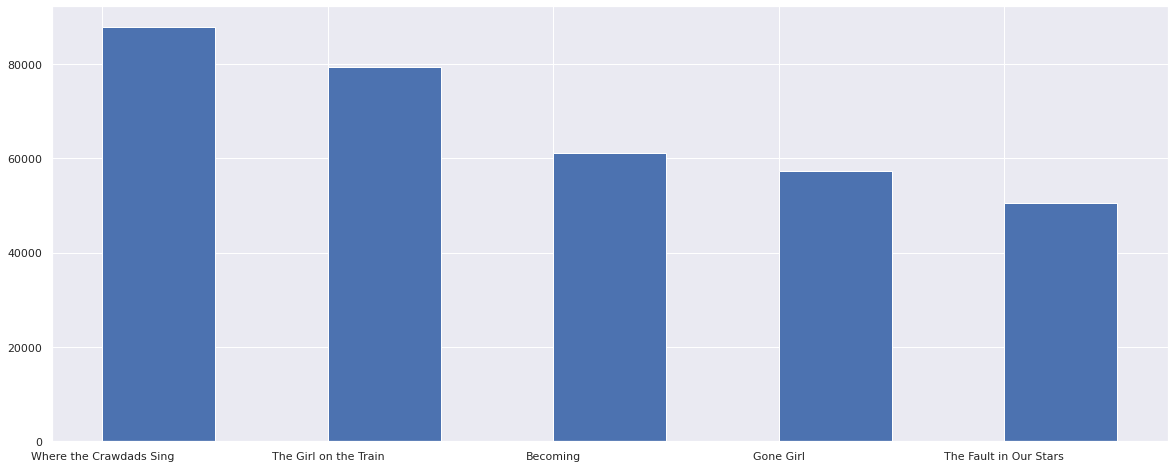

In [4]:
#visualizing the first 5 books of the decade using reviews as a determinant
plt.figure(figsize=(20, 8))
plt.bar(dataa.Name.head(10), dataa.Reviews.head(10), width=0.5, align='edge') 

plt.show()


# PERCENTAGE OF FICTION TO NON-FICTION

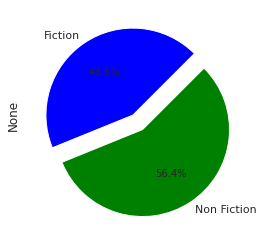

In [5]:
#using pie-chart to visualize the percentage of fiction to non-fiction
explode =(0.0,0.2)

colors = ( "blue", "green")

data.groupby('Genre').size().plot(kind='pie', explode=explode,startangle=45, colors=colors, autopct='%1.1f%%')


plt.show()

# TRENDS OVER THE YEARS


In [6]:
#sorting the data set according to year 
datah = data.sort_values('Year', ascending = True)

datah.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
177,"I, Alex Cross",James Patterson,4.6,1320,7,2009,Fiction
131,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,4.6,1365,11,2009,Non Fiction
417,The Last Lecture,Randy Pausch,4.7,4028,9,2009,Non Fiction
241,New Moon (The Twilight Saga),Stephenie Meyer,4.6,5680,10,2009,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction


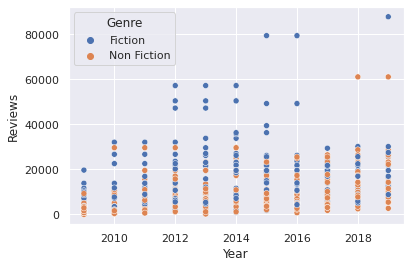

In [7]:
#using the genre column as a determinant for trends over the years
sns.scatterplot(x='Year', y='Reviews', hue='Genre', data=datah)

The scatter plot above shows us that as time went on people read more and people read more of non-fiction books. 

# TOP 10 AUTHORS ACCORDING TO REVIEWS

In [8]:
#elimanting duplicates of books that appeared more than once and also finding the mean of the reviews the books got
dayra = data.pivot_table(values="Reviews", index=["Name", "Author"], aggfunc=np.mean).reset_index()
dayra

,Name,Author,Reviews
0,10-Day Green Smoothie Cleanse,JJ Smith,17350.0
1,11/22/63: A Novel,Stephen King,2052.0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,18979.0
3,1984 (Signet Classics),George Orwell,21424.0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,7665.0
...,...,...,...
346,Winter of the World: Book Two of the Century T...,Ken Follett,10760.0
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,1302.0
348,Wonder,R. J. Palacio,21625.0
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,9413.0


In [9]:
#summing up reviews of the books written by same authors

sfv = dayra.pivot_table(values='Reviews', index='Author', aggfunc=np.sum).sort_values('Reviews', ascending=False)

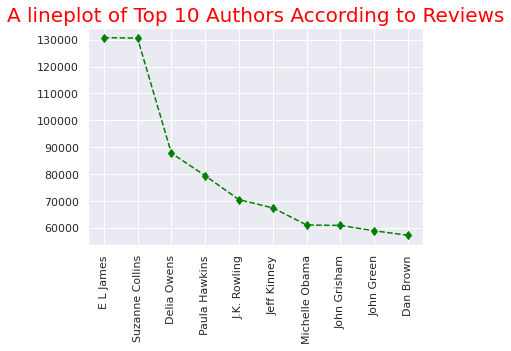

In [21]:
plt.plot(sfv.index[:10], sfv.Reviews.head(10), color='green', linestyle='--', marker='d')
plt.xticks(rotation='vertical')
plt.title('A lineplot of Top 10 Authors According to Reviews', fontsize=20,color='red')
plt.show()

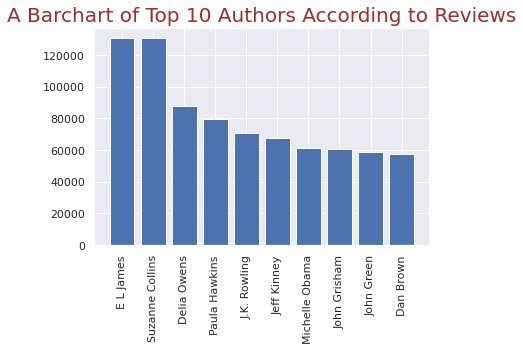

In [22]:
plt.bar(sfv.index[:10], sfv.Reviews.head(10))
plt.xticks(rotation='vertical')
plt.title('A Barchart of Top 10 Authors According to Reviews', fontsize=20,color='brown')
plt.show()